<a href="https://colab.research.google.com/github/fadlizaenalaripin/Superstore-Sales/blob/main/Prediksi_Penjualan_Produk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from prophet import Prophet

In [ ]:
# Load Superstore Sales Dataset
df = pd.read_csv('train.csv', parse_dates=['Order Date'])

# Rename kolom
df.rename(columns={'Order Date':'date', 'Sales':'sales', 'Product Name':'product',
                   'Category':'category','Sub-Category':'sub_category'}, inplace=True)

# Cek data awal
print(df.head())

   Row ID        Order ID        date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         cat

In [ ]:
# Hapus outlier menggunakan IQR
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[(df['sales'] >= Q1 - 1.5*IQR) & (df['sales'] <= Q3 + 1.5*IQR)]
print(f"Sisa data setelah hapus outlier: {len(df_clean)} baris")

Sisa data setelah hapus outlier: 8655 baris


In [ ]:
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')

/tmp/ipython-input-1354136620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')


In [ ]:
# Fitur tanggal
df_clean['dayofweek'] = df_clean['date'].dt.dayofweek
df_clean['month'] = df_clean['date'].dt.month
df_clean['quarter'] = df_clean['date'].dt.quarter

# Encode kategori & subkategori (one-hot)
df_encoded = pd.get_dummies(df_clean, columns=['category','sub_category'], drop_first=True)

# Target & fitur
feature_cols = ['dayofweek','month','quarter'] + [col for col in df_encoded.columns if 'category_' in col or 'sub_category_' in col]
X = df_encoded[feature_cols]
y = df_encoded['sales']

/tmp/ipython-input-1673459340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['dayofweek'] = df_clean['date'].dt.dayofweek
/tmp/ipython-input-1673459340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month'] = df_clean['date'].dt.month
/tmp/ipython-input-1673459340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Random Forest MSE: 10280.39
Random Forest RMSE: 101.39


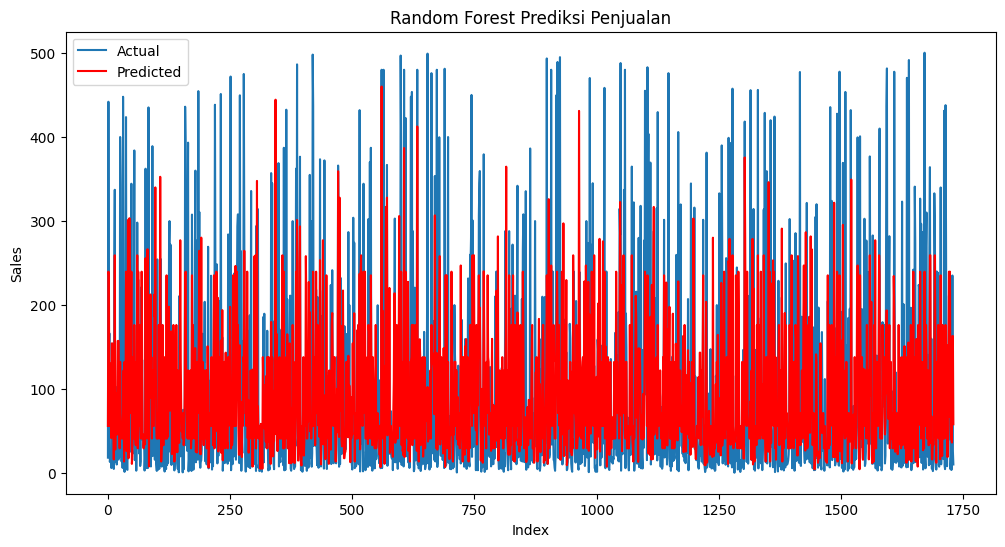

In [ ]:
# Split train-test (tidak di-shuffle karena time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Random Forest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

# Evaluasi
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

# Plot prediksi vs actual
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(pred_rf, label='Predicted', color='red')
plt.title('Random Forest Prediksi Penjualan')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb9uiz293/z4ceqguu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb9uiz293/jq25zx46.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16303', 'data', 'file=/tmp/tmpb9uiz293/z4ceqguu.json', 'init=/tmp/tmpb9uiz293/jq25zx46.json', 'output', 'file=/tmp/tmpb9uiz293/prophet_modelui2s998u/prophet_model-20250830142801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet MSE: 357797.80
Prophet RMSE: 598.16


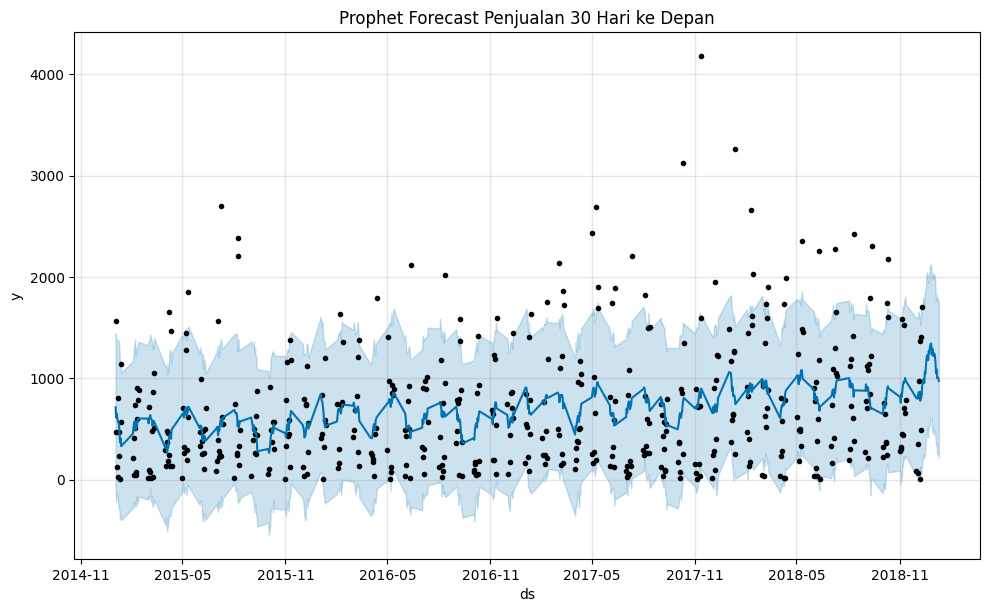

In [ ]:
# Aggregate total sales per hari
df_prophet = df_clean.groupby('date')['sales'].sum().reset_index()
df_prophet = df_prophet.rename(columns={'date':'ds','sales':'y'})

# Model Prophet dengan tuning
model_prophet = Prophet(daily_seasonality=True,
                        yearly_seasonality=True,
                        changepoint_prior_scale=0.5,   # lebih sensitif terhadap tren
                        seasonality_prior_scale=10.0)  # lebih kuat pengaruh musiman
model_prophet.fit(df_prophet)

# Prediksi 30 hari ke depan
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Evaluasi akurasi pada data historis
df_eval = forecast.set_index('ds').join(df_prophet.set_index('ds'), how='inner')
mse_prophet = mean_squared_error(df_eval['y'], df_eval['yhat'])
rmse_prophet = np.sqrt(mse_prophet)
print(f"Prophet MSE: {mse_prophet:.2f}")
print(f"Prophet RMSE: {rmse_prophet:.2f}")

# Plot hasil forecast
model_prophet.plot(forecast)
plt.title("Prophet Forecast Penjualan 30 Hari ke Depan")
plt.show()

In [ ]:
from prophet import Prophet

category_list = df_clean['category'].unique()
forecast_category = {}

for cat in category_list:
    df_cat = df_clean[df_clean['category'] == cat]
    df_cat_prophet = df_cat.groupby('date')['sales'].sum().reset_index()
    df_cat_prophet = df_cat_prophet.rename(columns={'date':'ds','sales':'y'})

    model = Prophet(daily_seasonality=True,
                    yearly_seasonality=True,
                    changepoint_prior_scale=0.5,
                    seasonality_prior_scale=10.0)
    model.fit(df_cat_prophet)

    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)
    forecast_category[cat] = forecast

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb9uiz293/4qt4l_na.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb9uiz293/nwy684p7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14959', 'data', 'file=/tmp/tmpb9uiz293/4qt4l_na.json', 'init=/tmp/tmpb9uiz293/nwy684p7.json', 'output', 'file=/tmp/tmpb9uiz293/prophet_model0nus9acc/prophet_model-20250830142547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb9uiz293/a9bcgtoj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb9uiz293/g7bxrrzn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for cat in category_list:
    forecast = forecast_category[cat]
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                             mode='lines', name=f'{cat} Predicted'))

# Tambahkan data actual total sales per kategori
for cat in category_list:
    df_cat = df_clean[df_clean['category'] == cat]
    df_cat_sum = df_cat.groupby('date')['sales'].sum().reset_index()
    fig.add_trace(go.Scatter(x=df_cat_sum['date'], y=df_cat_sum['sales'],
                             mode='markers', name=f'{cat} Actual'))

fig.update_layout(title='Forecast Penjualan per Kategori',
                  xaxis_title='Tanggal',
                  yaxis_title='Sales',
                  legend_title='Kategori')
fig.show()